In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil

DATA_SOURCE_MAPPING = '/content/drive/MyDrive/MBFS/MBINDIA_profile_scraping.xlsx'
YOUR_INPUT_PATH = '/content/dataset'

os.makedirs(YOUR_INPUT_PATH, exist_ok=True)

try:
    shutil.copy(DATA_SOURCE_MAPPING, YOUR_INPUT_PATH)
    print(f"Dataset '{os.path.basename(DATA_SOURCE_MAPPING)}' copied to '{YOUR_INPUT_PATH}'.")
except Exception as e:
    print(f"Failed to copy dataset: {e}")



Dataset 'MBINDIA_profile_scraping.xlsx' copied to '/content/dataset'.


In [ ]:
from google.colab import drive

dataset_path = '/content/drive/MyDrive/MBFS/MBINDIA_profile_scraping.xlsx'

import os
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
import pandas as pd

data = pd.read_excel('/content/drive/MyDrive/MBFS/MBINDIA_profile_scraping.xlsx')



### Data pre processing

In [ ]:

#data['comments'] = data['comments'].replace('NA', '')


In [ ]:

data = data[data['latestComments/0/text'].notna() & (data['latestComments/0/text'] != 'NA')]


stop_words = set(stopwords.words('english'))

def preprocess_comments(text):
    try:
        words = word_tokenize(text)
        filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
        return ' '.join(filtered_words)
    except:
        return ''

data['latestComments/0/text'] = data['latestComments/0/text'].apply(preprocess_comments)

### Sentiment Analysis

In [ ]:
analyzer = SentimentIntensityAnalyzer()

data['Sentiment'] = data['latestComments/0/text'].apply(lambda x: analyzer.polarity_scores(x))

data['Sentiment'] = data['Sentiment'].apply(lambda x: x['compound'])

### Data visualization

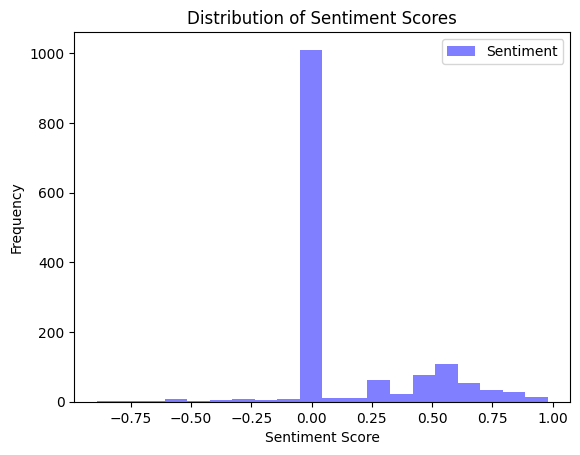

In [ ]:

plt.hist(data['Sentiment'], bins=20, alpha=0.5, color='b', label='Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.legend(loc='best')
plt.show()


In [ ]:

def characterize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
data['Sentiment_Label'] = data['Sentiment'].apply(characterize_sentiment)


In [ ]:
Sentiment_labels = data['Sentiment_Label']
Sentiment_labels.value_counts()

Sentiment_Label
Neutral     1010
Positive     422
Negative      42
Name: count, dtype: int64

<ipython-input-12-ff4dd15c5b87>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set2")


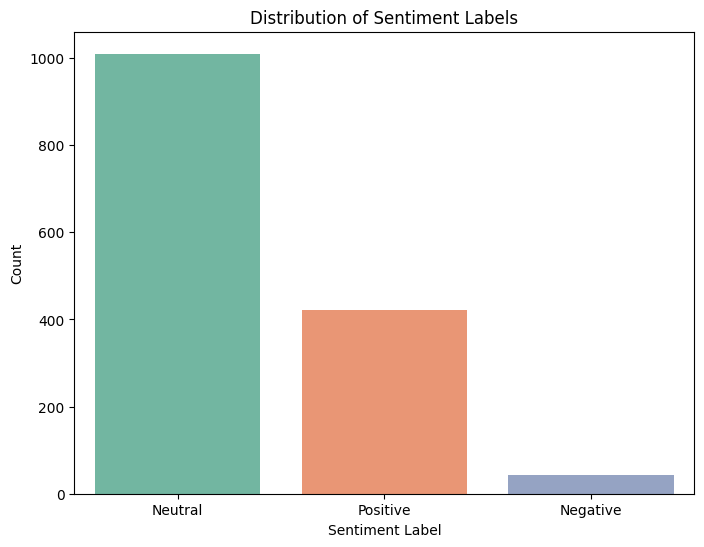

In [ ]:

sentiment_counts = Sentiment_labels.value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="Set2")

plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Labels")

plt.show()

In [ ]:
data2 = data[['latestComments/0/text','Sentiment_Label']]
data2.head(30)

,latestComments/0/text,Sentiment_Label
0,.,Neutral
1,❤️❤️❤️❤️❤️ أنا بحب مرسيدس ❤️,Neutral
2,umma,Neutral
3,price,Neutral
4,❤️❤️❤️❤️❤️❤️❤️❤️❤️,Neutral
5,❤️,Neutral
6,navratri yaad nhi kya ... ? ?,Neutral
7,koenigsegg,Neutral
9,mere paas isse acha model hai aur mehngi bhi,Neutral
10,gift 1 2,Positive
